# SDG 8.5 in Vietnam Data Analysis Project

Author: Trang Ha Nguyen (Helen), Pomona 2024

## 8.5.1

- Monetary Data is in Current Local Currency

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
wage_df = pd.read_csv('wage.csv')
wage_df = wage_df.drop(columns=['GeoAreaName', 'Source', 'Units'])
wage_df.head() # --> average hourly earnings of employees by sex and occupation measured in Current Local Currency

,TimePeriod,Value,Sex,Typeofoccupation
0,2019,31909.6,BOTHSEX,isco08
1,2016,27103.2,BOTHSEX,isco08
2,2017,26679.7,BOTHSEX,isco08
3,2018,28666.1,BOTHSEX,isco08
4,2009,2626.4,BOTHSEX,isco08


### Occupation Pay
**International Standard Classification of Occupations**

Rationale: facilitate the international use and comparison of occupational information


isco08	All occupations (isco-08)<br/>
isco08-0	Armed forces occupations<br/>
isco08-1	Managers<br/>
isco08-2	Professionals<br/>
isco08-3	Technicians and associate professionals<br/>
isco08-4	Clerical support workers<br/>
isco08-5	Service and sales workers<br/>
isco08-6	Skilled agricultural, forestry and fishery workers<br/>
isco08-7	Craft and related trades workers<br/>
isco08-8	Plant and machine operators, and assemblers<br/>
isco08-9	Elementary occupations<br/>
isco08-X	Not elsewhere classified<br/> 		


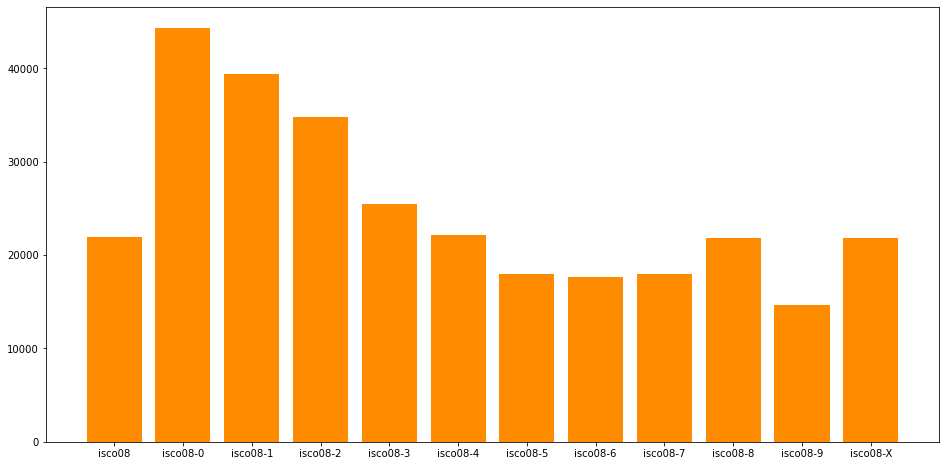

In [26]:
wage_occ_df = wage_df.groupby('Typeofoccupation').agg({'Value':'mean'})

# bar chart: occupation pay
fig = plt.figure(figsize=[16, 8])
plt.bar(wage_occ_df.index, wage_occ_df.Value, color='darkorange')
plt.show()

### Gender Pay over Occupation

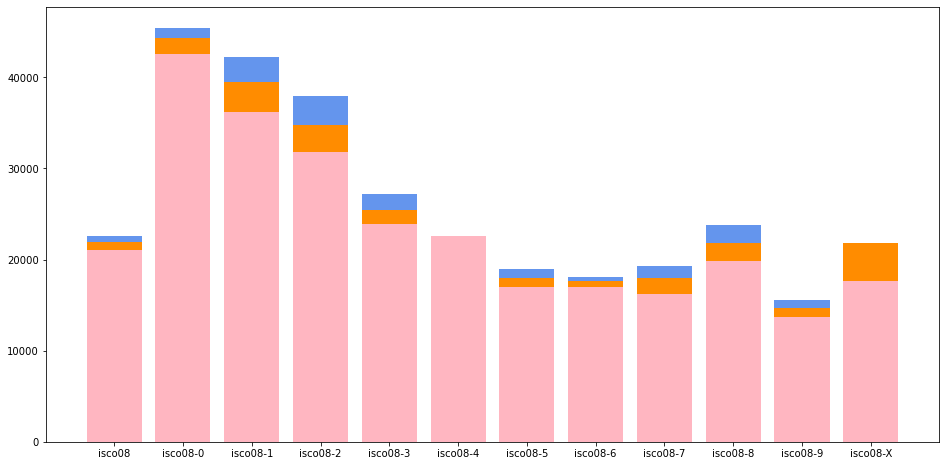

In [27]:
wage_f_df = wage_df[ wage_df['Sex'] == 'FEMALE' ]
wage_f_df = wage_f_df.groupby('Typeofoccupation').agg({'Value':'mean'})

wage_m_df = wage_df[ wage_df['Sex'] == 'MALE' ]
wage_m_df = wage_m_df.groupby('Typeofoccupation').agg({'Value':'mean'})

fig = plt.figure(figsize=[16, 8])
plt.bar(wage_m_df.index, wage_m_df.Value, color='cornflowerblue')
plt.bar(wage_occ_df.index, wage_occ_df.Value, color='darkorange')
plt.bar(wage_f_df.index, wage_f_df.Value, color='lightpink')
plt.show()

Group isco08-4 Clerical support workers is the only group where on average, female pay is higher than male pay. Other groups, on average, have male pay higher than female pay.

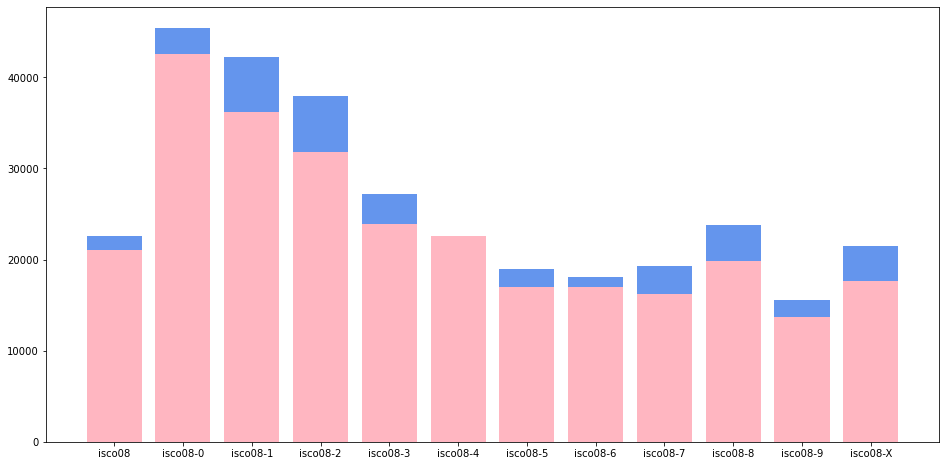

In [28]:
fig = plt.figure(figsize=[16, 8])
plt.bar(wage_m_df.index, wage_m_df.Value, color='cornflowerblue')
plt.bar(wage_f_df.index, wage_f_df.Value, color='lightpink')
plt.show()

### Gender Pay Gap & Occupation

Statistics on average hourly earnings by sex can be used to calculate the gender pay gap:<br/>
Gender Pay Gap = (Male_Wage - Female_Wage) / Male_Wage x 100

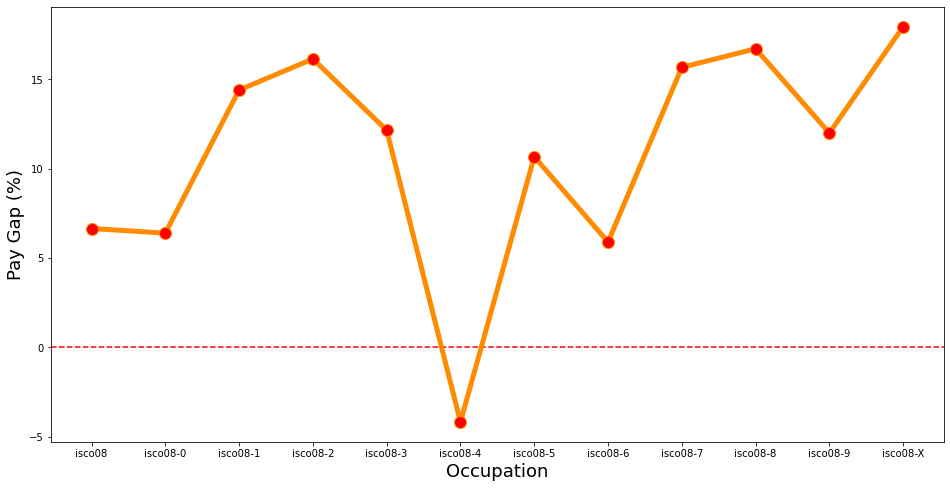

In [31]:
gap_df = wage_m_df.merge(wage_f_df, on='Typeofoccupation', suffixes=['_m', '_f'])
gap_df['Gap%'] = ((gap_df['Value_m'] - gap_df['Value_f'])/gap_df['Value_m']) * 100

fig = plt.figure(figsize=[16, 8])
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(gap_df.index, gap_df['Gap%'], color='darkorange', linewidth='5', 
         marker='o', markerfacecolor='red', markersize=12)
plt.xlabel('Occupation', fontsize=18)
plt.ylabel('Pay Gap (%)', fontsize=18)
plt.show()

### Pay over Time

Average Pay over Time Regardless of Occupation

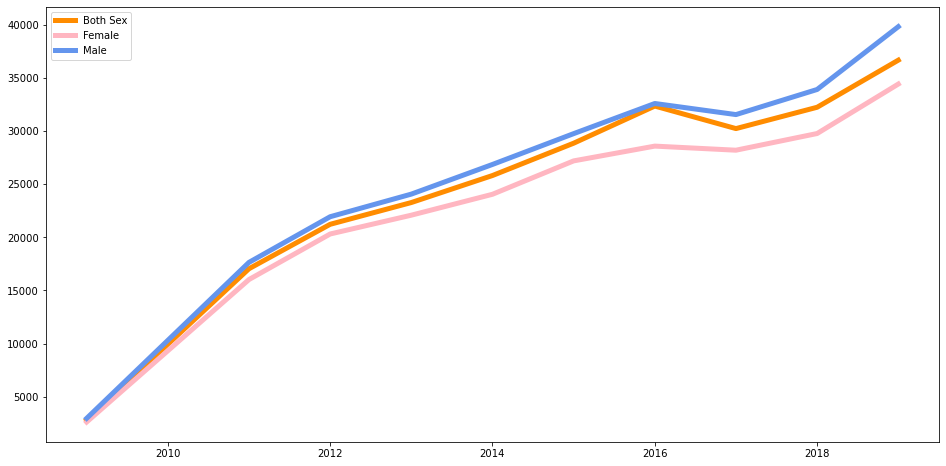

In [24]:
# average pay over time (regardless of occupation)
year_df = wage_df[ wage_df['Sex'] == 'BOTHSEX' ].groupby('TimePeriod').agg({'Value':'mean'})
year_f_df = wage_df[ wage_df['Sex'] == 'FEMALE' ].groupby('TimePeriod').agg({'Value':'mean'})
year_m_df = wage_df[ wage_df['Sex'] == 'MALE' ].groupby('TimePeriod').agg({'Value':'mean'})

# line chart: pay over time (both sex)
fig = plt.figure(figsize=[16, 8])
plt.plot(year_df.index, year_df.Value, color='darkorange', linewidth='5', label='Both Sex')
plt.plot(year_f_df.index, year_f_df.Value, color='lightpink', linewidth='5', label='Female')
plt.plot(year_m_df.index, year_m_df.Value, color='cornflowerblue', linewidth='5', label='Male')
plt.legend()
plt.show()

### Gender Pay Gap over Time

Statistics on average hourly earnings by sex can be used to calculate the gender pay gap:<br/>
Gender Pay Gap = (Male_Wage - Female_Wage) / Male_Wage x 100


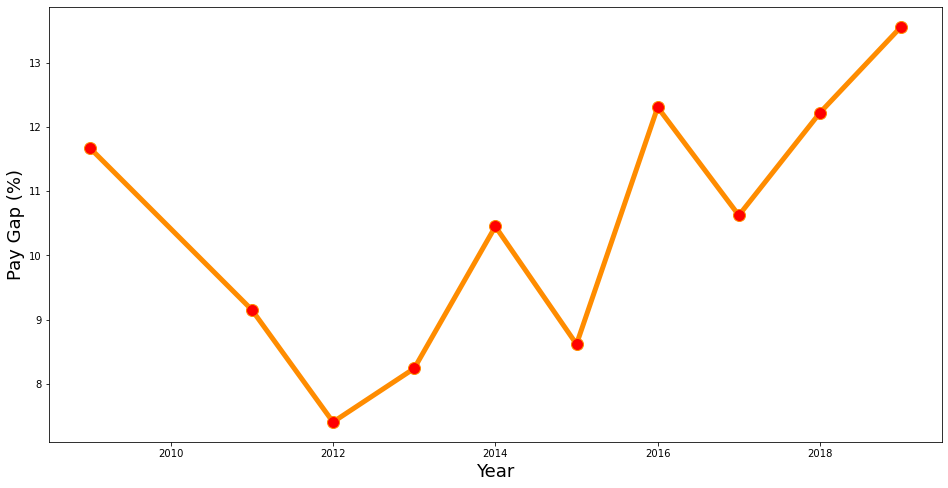

In [32]:
gap_trend_df = year_m_df.merge(year_f_df, on='TimePeriod', suffixes=['_m', '_f'])
gap_trend_df['Gap%'] = ((gap_trend_df['Value_m'] - gap_trend_df['Value_f'])/gap_trend_df['Value_m']) * 100

fig = plt.figure(figsize=[16, 8])
plt.plot(gap_trend_df.index, gap_trend_df['Gap%'], color='darkorange', linewidth='5', 
         marker='o', markerfacecolor='red', markersize=12)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Pay Gap (%)', fontsize=18)
plt.show()

Paradoxically, year 2012 with the lowest gender pay gap is also the year with the most economic difficulties and changes among the years. For example, in 2012, industrial output stagnated, and inventory could not well circulate. Another example would be plummeting foreign investment in 2012.

### Assessment - Target 8.5 - Indicator 8.5.1

Average hourly earnings of female and male employees, by occupation, age and persons with disabilities<br/>
Progress? Average Hourly Earnings<br/>
Room for Improvement? Gender Gap in Average Hourly Earnings Across Occupation and Over Time<br/>
Recommendation? Data on Age and Persons with Disabilities<br/>

## 8.5.2
* Unemployment Rate is measured in Percentage

In [33]:
ur_sex_age_df = pd.read_csv('ur_sex_age.csv')
ur_sex_age_df = ur_sex_age_df.drop(columns=['GeoAreaName', 'Source', 'Units'])
ur_sex_age_df.head()

,TimePeriod,Value,Age,Sex
0,2019,2.0,15+,BOTHSEX
1,2015,1.9,15+,BOTHSEX
2,2016,1.9,15+,BOTHSEX
3,2017,1.9,15+,BOTHSEX
4,2018,1.2,15+,BOTHSEX


### Unemployment Rate over Time (%)

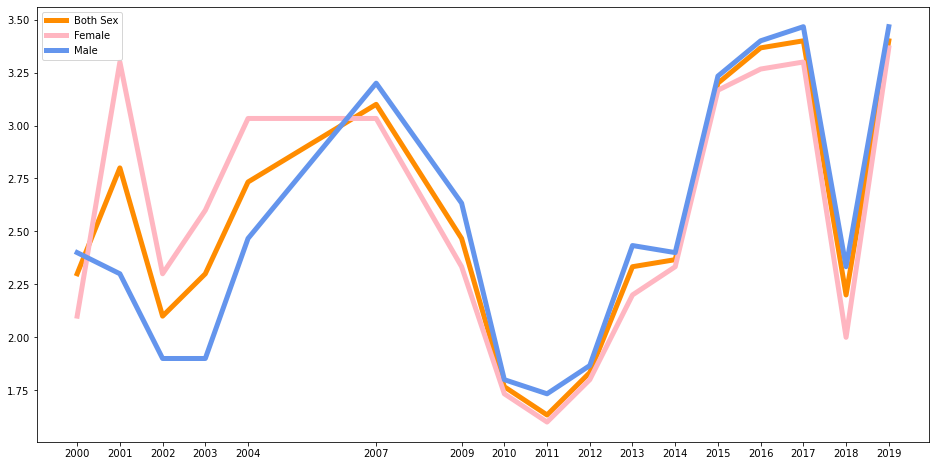

In [34]:
# ur over time (regardless of occupation)
ur_df = ur_sex_age_df[ ur_sex_age_df['Sex'] == 'BOTHSEX' ].groupby('TimePeriod').agg({'Value':'mean'})
ur_f_df = ur_sex_age_df[ ur_sex_age_df['Sex'] == 'FEMALE' ].groupby('TimePeriod').agg({'Value':'mean'})
ur_m_df = ur_sex_age_df[ ur_sex_age_df['Sex'] == 'MALE' ].groupby('TimePeriod').agg({'Value':'mean'})

# line chart: ur over time
fig = plt.figure(figsize=[16, 8])
plt.plot(ur_df.index, ur_df.Value, color='darkorange', linewidth='5', label='Both Sex')
plt.plot(ur_f_df.index, ur_f_df.Value, color='lightpink', linewidth='5', label='Female')
plt.plot(ur_m_df.index, ur_m_df.Value, color='cornflowerblue', linewidth='5', label='Male')
plt.xticks(ur_df.index)
plt.legend()
plt.show()

Progress? Unemployment rate gap by sex decreases over time <br/>
Note? Cyclical unemployment and Year 2018<br/>

In 2018, there were many memorable economic and social occurrences, including but not limited to Vietnam attaining its highest GDP in a decade, setting many new export records, and many amendments in favor of a more open and competitive economic environment.



### Unemployment Rate, by Age over Time (%)

No data from 2000 to 2003 for 15-24 and 25+

In interpreting unemployment rate for each age group, take into consideration:
- who the age group refers to
- labor force composites
- social and cultural setting of the age group (schooling, etc.)

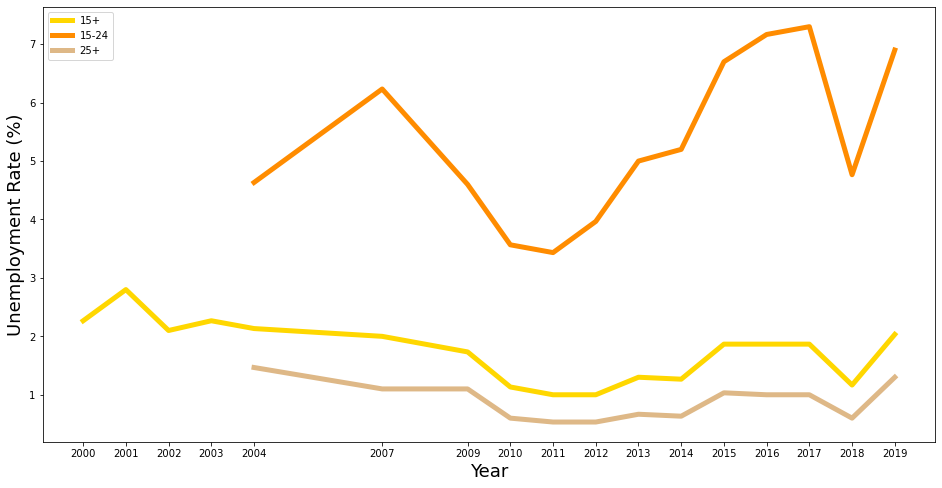

In [35]:
# ur of age over time (regardless of occupation)
age15_df = ur_sex_age_df[ ur_sex_age_df['Age'] == '15+' ].groupby('TimePeriod').agg({'Value':'mean'})
age1524_df = ur_sex_age_df[ ur_sex_age_df['Age'] == '15-24' ].groupby('TimePeriod').agg({'Value':'mean'})
age25_df = ur_sex_age_df[ ur_sex_age_df['Age'] == '25+' ].groupby('TimePeriod').agg({'Value':'mean'})

# line chart: ur of age over time
fig = plt.figure(figsize=[16, 8])
plt.plot(age15_df.index, age15_df.Value, color='gold', linewidth='5', label='15+')
plt.plot(age1524_df.index, age1524_df.Value, color='darkorange', linewidth='5', label='15-24')
plt.plot(age25_df.index, age25_df.Value, color='burlywood', linewidth='5', label='25+')
plt.xticks(age15_df.index)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontsize=18)
plt.legend()
plt.show()

### Unemployment Rate, by Sex and Age (%)

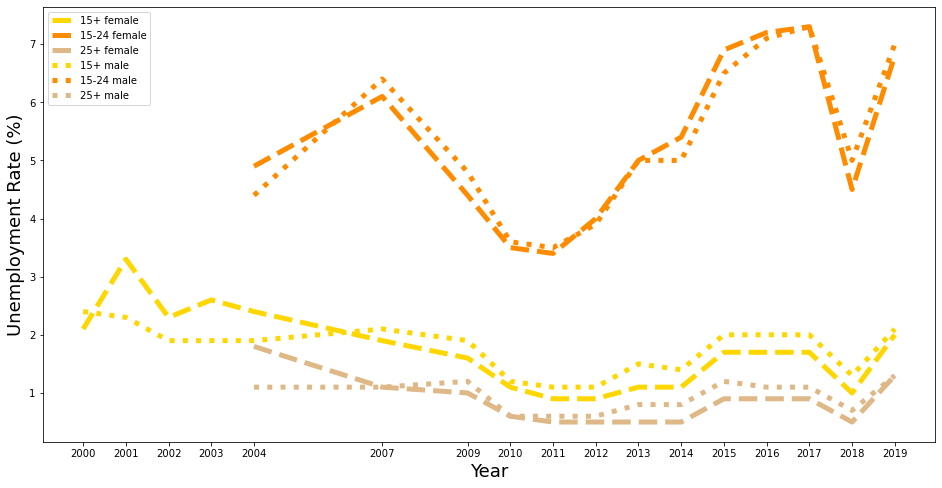

In [36]:
# female
f_df = ur_sex_age_df[ ur_sex_age_df['Sex'] == 'FEMALE' ]

f_15_df = f_df[ f_df['Age'] == '15+' ].groupby('TimePeriod').agg({'Value':'mean'})
f_1524_df = f_df[ f_df['Age'] == '15-24' ].groupby('TimePeriod').agg({'Value':'mean'})
f_25_df = f_df[ f_df['Age'] == '25+' ].groupby('TimePeriod').agg({'Value':'mean'})

#male
m_df = ur_sex_age_df[ ur_sex_age_df['Sex'] == 'MALE' ]

m_15_df = m_df[ m_df['Age'] == '15+' ].groupby('TimePeriod').agg({'Value':'mean'})
m_1524_df = m_df[ m_df['Age'] == '15-24' ].groupby('TimePeriod').agg({'Value':'mean'})
m_25_df = m_df[ m_df['Age'] == '25+' ].groupby('TimePeriod').agg({'Value':'mean'})

# draw plot
fig = plt.figure(figsize=[16, 8])
plt.plot(f_15_df.index, f_15_df.Value, color='gold', linewidth='5', linestyle='--', label='15+ female')
plt.plot(f_1524_df.index, f_1524_df.Value, color='darkorange', linewidth='5', linestyle='--', label='15-24 female')
plt.plot(f_25_df.index, f_25_df.Value, color='burlywood', linewidth='5', linestyle='--', label='25+ female')

plt.plot(m_15_df.index, m_15_df.Value, color='gold', linewidth='5', linestyle=':', label='15+ male')
plt.plot(m_1524_df.index, m_1524_df.Value, color='darkorange', linewidth='5', linestyle=':', label='15-24 male')
plt.plot(m_25_df.index, m_25_df.Value, color='burlywood', linewidth='5', linestyle=':', label='25+ male')

plt.xticks(age15_df.index)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontsize=18)
plt.legend()
plt.show()

### Matched Pairs Experiment
Given significance level 5%, hypotheses are:

H0:  µD = 0<br/>
H1:  µD > 0

In [21]:
pair_df = pd.merge(ur_m_df, ur_f_df, on='TimePeriod', suffixes=['_m', '_f'])
pair_df['Diff_fm'] = pair_df['Value_f'] - pair_df['Value_m']
pair_df

,Value_m,Value_f,Diff_fm
TimePeriod,,,
2000,2.400000,2.100000,-0.300000
2001,2.300000,3.300000,1.000000
2002,1.900000,2.300000,0.400000
2003,1.900000,2.600000,0.700000
2004,2.466667,3.033333,0.566667
2007,3.200000,3.033333,-0.166667
2009,2.633333,2.333333,-0.300000
2010,1.800000,1.733333,-0.066667
2011,1.733333,1.600000,-0.133333


In [22]:
stats.ttest_1samp(a=pair_df['Diff_fm'], popmean=0).pvalue / 2

0.37184587845166917

Because the p-value of our test (0.3718) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the unemployment rate for female is greater than that for male.

### Assessment - Target 8.5 - Indicator 8.5.2


Unemployment rate, by sex, age (and persons with disabilities - no data)<br/>
Progress? Unemployment rate gap by sex<br/>
Room for Improvement? Unemployment rate by age for age group 15-24<br/>
Recommendation? More data on age group 15-24<br/>
